In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Load

In [2]:
from os import listdir
file_path = './mini-project_CNN/LION/'
train_path = ['active lion', 'African lion', 'national geographic lion']
valid_path = ['lion photo']
test_path = ['female lion', 'male lion', 'Panthera leo azandica', 'Panthera leo bleyenberghi', 'Panthera leo krugeri', 
             'Panthera leo leo', 'Panthera leo melanochaita', 'Panthera leo nubica', 'Panthera leo persica',
             'Panthera leo senegalensis', 'real lion', '사자', '아프리카 사자']
listdir(file_path + train_path[0] + '/True')

['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000013.jpg',
 '000015.jpg',
 '000017.png',
 '000030.jpg',
 '000035.jpg',
 '000047.jpg',
 '000060.jpg',
 '000074.jpg',
 '000076.jpg',
 '000083.jpg',
 '000097.jpg',
 '000112.jpg',
 '000118.jpg',
 '000126.jpg',
 '000129.jpg',
 '000132.jpg',
 '000134.jpg',
 '000139.jpg',
 '000145.jpg',
 '000153.jpg',
 '000163.jpg',
 '000171.jpg',
 '000177.jpg',
 '000178.jpg',
 '000183.jpg',
 '000185.jpg',
 '000188.jpg',
 '000230.jpg',
 '000265.jpg',
 '000291.jpg',
 '000342.jpg']

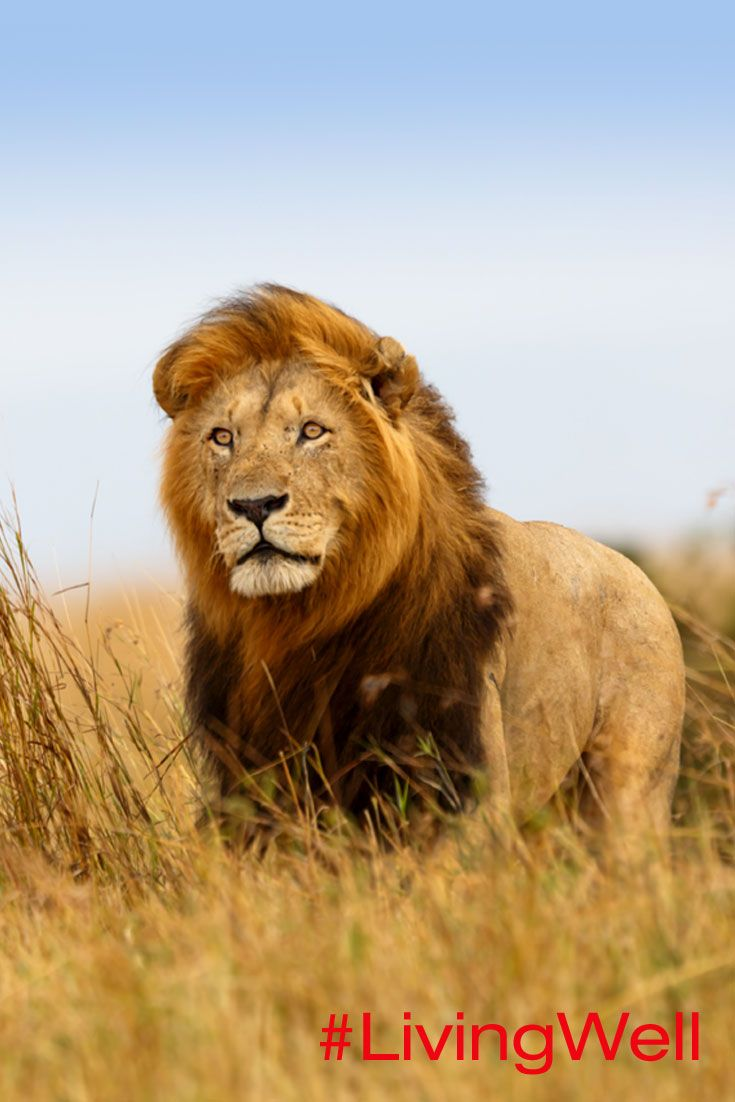

In [6]:
from PIL.Image import open as img_open
img_open(file_path + train_path[0] + '/True/' + '000001.jpg')

In [17]:
import PIL.Image

def data_load(file_path, data_path, bool_path=None):
    path = file_path + data_path + '/' + bool_path + '/'
    listdir_ = listdir(path)
    res, label = [], []
    for fname in listdir_:
        if bool_path == 'True':
            label.append(1)
        elif bool_path == 'False':
            label.append(0)
        else:
            if bool_path:
                print("Input bool_path = 'True' or 'False'")
                return None
        img = PIL.Image.open(path + fname)
        img = np.array(img)
        res.append(img)
    return res, label

In [28]:
%%time
X_train, y_train = [], []
for t_p in train_path:
    true_train, true_label = data_load(file_path, t_p, bool_path='True')
    false_train, false_label = data_load(file_path, t_p, bool_path='False')
    X_train.extend(true_train); X_train.extend(false_train)
    y_train.extend(true_label); y_train.extend(false_label)

X_valid, y_valid = [], []
true_valid, true_label = data_load(file_path, valid_path[0], bool_path='True')
false_valid, false_label = data_load(file_path, valid_path[0], bool_path='False')
X_valid.extend(true_valid); X_valid.extend(false_valid)
y_valid.extend(true_label); y_valid.extend(false_label)

Wall time: 1min 4s


In [29]:
len(X_train), len(y_train), len(X_valid), len(y_valid)

(1187, 1187, 491, 491)

In [30]:
import cv2